In [22]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
# Function to compute response given predictor
def f(x):
    return np.cos(3*np.pi*x)/x

In [24]:
# Function to compute the derivative
def der_f(x):
    return -(3*np.pi*x*np.sin(3*np.pi*x)+np.cos(3*np.pi*x))/x**2

In [25]:
# Helper function to get tangent points
def get_tangent_line(x, x_range=.5):
    y = f(x)
    m = der_f(x)
    # get tangent line points
    # slope point form: y-y_1 = m(x-x_1)
    # y = m(x-x_1)+y_1
    x1, y1 = x, y
    x = np.linspace(x1-x_range/2, x1+x_range/2, 50)
    y = m*(x-x1)+y1
    return x, y, m

In [26]:
# Helper function to plot the data
def plot_it(cur_x, title='', ax=plt):
    y = f(x)
    ax.plot(x,y)
    ax.scatter(cur_x, f(cur_x), c='r', s=80, alpha=1);
    x_tan, y_tan, der = get_tangent_line(cur_x)
    ax.plot(x_tan, y_tan, ls='--', c='r')
    # indicate when if our location is outside the x range
    if cur_x > x.max():
        ax.axvline(x.max(), c='r', lw=3)
        ax.arrow(x.max()/1.6, y.max()/2, x.max()/5, 0, color='r', head_width=.25)
    if cur_x < x.min():
        ax.axvline(x.min(), c='r', lw=3)
        ax.arrow(x.max()/2.5, y.max()/2, -x.max()/5, 0, color='r', head_width=.25)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(-3.5, 3.5)
    ax.set_title(title)

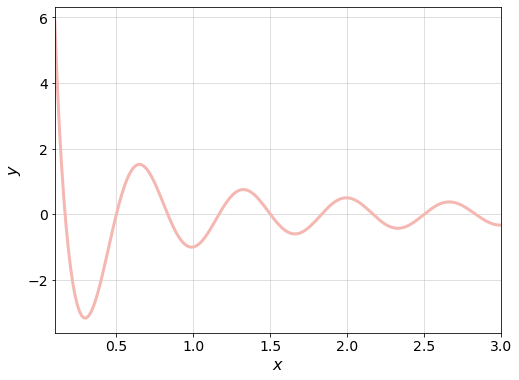

In [27]:
# Generate predictor data
x = np.linspace(0.1,3, 200)

# Get the response data by calling the function f 
y = f(x)

# Plot the generated data
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(x,y, linewidth=3, color='#F5B7B1')
plt.xlim(x.min(), x.max());
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.grid(alpha=0.5)
plt.show()

In [28]:
# Function to perform clipping
# This function should retun the gradient with a magnitude <=clip_threshold

def clip(g, clip_threshold=8):
    
    # Compare the absolute value of the gradient with the clip_threshold
    if np.abs(g) > clip_threshold:
        
    #Compute the gradient based on the equation given
        g = g*clip_threshold/np.abs(g)
        
    return g

In [29]:
# Set the initial value of x
cur_x = 0.5 

# The learning rate for gradient descent
learning_rate = 0.001

# The decay rate determines the percent by which the learning rate reduces each step
decay_rate = 0.5

# Setting the epsilon value
epsilon = 0.025

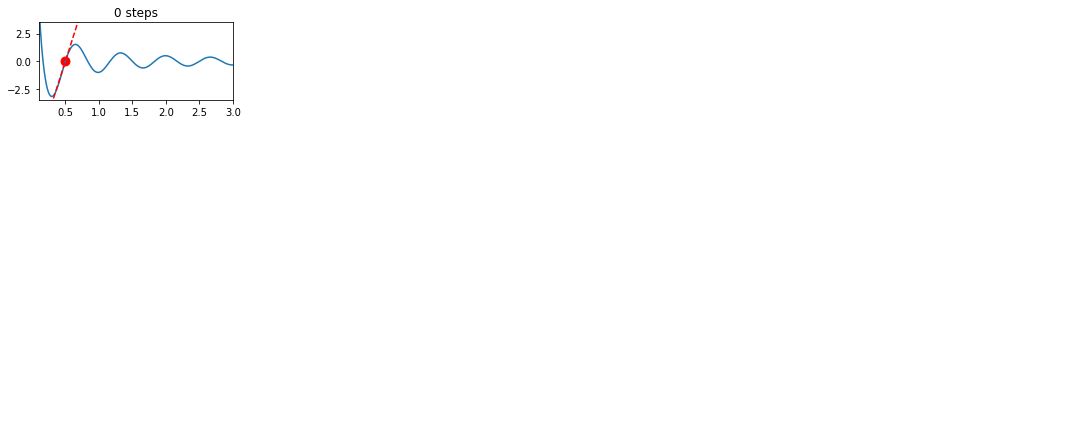

In [30]:
fig, axs = plt.subplots(4,5, figsize=(15,6), sharey=True)


for i, ax in enumerate(axs.ravel()):
    plot_it(cur_x, title=f"{i} step{'' if i == 1 else 's'}", ax=ax)
    
    # Store the x value before change in a separate variable
    prev_x = cur_x 
    
    # Compute the derivative of x
    der_cur_x = der_f(cur_x)
    
    # Get the gradient of the derivative of x using clipping
    g = clip(der_cur_x)

    # Update the x-value using the learning rate
    cur_x = cur_x - learning_rate*g 
    
    # Update the learning rate based on the decay rate
    learning_rate = learning_rate*(1-decay_rate)
    
    # Stop algorithm if magnitude of change below epsilon
    if np.abs(cur_x - prev_x) <= epsilon: 
        # hide unused subplots
        for ax in axs.ravel()[i+1:]:
            ax.axis('off') 
        break

plt.tight_layout()

if i == len(axs.ravel())-1:
    print('Did not converge!')

In [31]:
cur_x

0.492

## Mindchow 🍲

After marking your exercise, try tweaking learning_rate, decay_rate, and perhaps the default value of clip_threshold. Can you anticipate how it will affect your results? 

See if you can find a combination that will converge to the global minimum.